# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `dataproject.py` file includes a function which will be used multiple times in this notebook.

Imports and set magics:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2 # install with pip install matplotlib-venn

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

## Wage

**Read the Lonniveau data** in ``LIGELB1.xlsx`` and **clean it** removing and renaming columns:

In [64]:
# a. load
wage = pd.read_excel('LIGELB1.xlsx', skiprows=2)

# b. drop columns
drop_these = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']
wage.drop(drop_these, axis=1, inplace=True)

# c. rename columns
wage.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True)

The dataset now looks like this:

In [65]:
wage.head()

,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,35734,36941,37527,38290,38708,39111,39763,40291,41144,41931
1,København,36607,37836,38595,39302,39863,40339,41190,41740,42894,43953
2,Frederiksberg,41119,42816,43450,44220,44873,45424,46297,47182,48321,49563
3,Dragør,43215,44832,46357,47181,47302,47961,49333,50410,51451,52807
4,Tårnby,36147,36811,38133,38332,38815,39284,39946,40575,41559,42664


**Remove all rows which are not municipalities**:

In [66]:
wage = dataproject.only_keep_municipalities(wage)
wage.head()

,municipality,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Hele landet,35734,36941,37527,38290,38708,39111,39763,40291,41144,41931
1,København,36607,37836,38595,39302,39863,40339,41190,41740,42894,43953
2,Frederiksberg,41119,42816,43450,44220,44873,45424,46297,47182,48321,49563
3,Dragør,43215,44832,46357,47181,47302,47961,49333,50410,51451,52807
4,Tårnby,36147,36811,38133,38332,38815,39284,39946,40575,41559,42664


**Convert the dataset to long format**:

In [80]:
# a. rename year columns
mydict = {str(i):f'wage{i}' for i in range(2009,2018)}
wage.rename(columns = mydict, inplace=True)

# b. convert to long
wage_long = pd.wide_to_long(wage, stubnames='wage', i='municipality', j='year').reset_index()

# c. show
wage_long.head()

,municipality,year,2018,wage
0,Hele landet,2009,41931,35734
1,København,2009,43953,36607
2,Frederiksberg,2009,49563,41119
3,Dragør,2009,52807,43215
4,Tårnby,2009,42664,36147


## Gini

In [81]:
# a. load
gini = pd.read_excel('IFOR41.xlsx', skiprows=2)

# b. drop columns
drop_these = ['Unnamed: 0']
gini.drop(drop_these, axis=1, inplace=True)

# c. rename columns
gini.rename(columns = {'Unnamed: 1':'municipality'}, inplace=True)

In [84]:
gini.head()

,municipality,gini2009,gini2010,gini2011,gini2012,gini2013,gini2014,gini2015,gini2016,gini2017,2018
0,Hele landet,26.74,27.47,27.68,27.37,27.88,28.33,28.77,28.97,29.32,29.10
1,København,29.38,31.44,31.38,31.25,31.86,32.13,32.70,33.24,33.65,33.71
2,Frederiksberg,30.33,32.93,33.22,33.53,33.92,34.98,34.37,34.85,35.71,35.42
3,Dragør,26.25,26.93,28.86,25.95,26.75,27.03,27.40,28.08,27.88,27.55
4,Tårnby,21.40,22.80,23.42,22.77,22.86,22.89,23.32,23.66,23.95,23.95


In [85]:
gini = dataproject.only_keep_municipalities(gini)
gini.head()

,municipality,gini2009,gini2010,gini2011,gini2012,gini2013,gini2014,gini2015,gini2016,gini2017,2018
0,Hele landet,26.74,27.47,27.68,27.37,27.88,28.33,28.77,28.97,29.32,29.10
1,København,29.38,31.44,31.38,31.25,31.86,32.13,32.70,33.24,33.65,33.71
2,Frederiksberg,30.33,32.93,33.22,33.53,33.92,34.98,34.37,34.85,35.71,35.42
3,Dragør,26.25,26.93,28.86,25.95,26.75,27.03,27.40,28.08,27.88,27.55
4,Tårnby,21.40,22.80,23.42,22.77,22.86,22.89,23.32,23.66,23.95,23.95


**Convert the dataset to long format**:

In [86]:
# a. rename year columns
mydict1 = {str(i):f'gini{i}' for i in range(2009,2018)}
gini.rename(columns = mydict1, inplace=True)

# b. convert to long
gini_long = pd.wide_to_long(gini, stubnames='gini', i='municipality', j='year').reset_index()

# c. show
gini_long.head()

,municipality,year,2018,gini
0,Hele landet,2009,29.10,26.74
1,København,2009,33.71,29.38
2,Frederiksberg,2009,35.42,30.33
3,Dragør,2009,27.55,26.25
4,Tårnby,2009,23.95,21.40


## Explore data set

In order to be able to **explore the raw data**, we here provide an **interactive plot** to show, respectively, the employment and income level in each municipality

The **static plot** is:

In [88]:
def plot_wage_gini(wage,gini,dataset,municipality): 
    
    if dataset == 'wage':
        df = wage
        y = 'wage'
    else:
        df = gini
        y = 'gini'
    
    I = df['municipality'] == municipality
    ax = df.loc[I,:].plot(x='year', y=y, style='-o')

The **interactive plot** is:

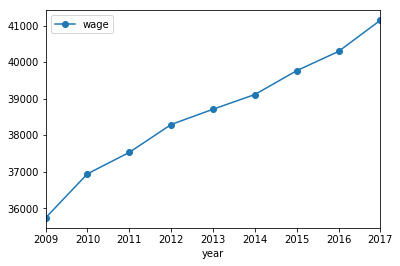

In [89]:
widgets.interact(plot_wage_gini, 
    
    wage = widgets.fixed(wage_long),
    gini = widgets.fixed(gini_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['wage','gini']),
    municipality = widgets.Dropdown(description='Municipality', 
                                    options=wage_long.municipality.unique())
                 
); 

ADD SOMETHING HERE IF THE READER SHOULD KNOW THAT E.G. SOME MUNICIPALITY IS SPECIAL.

# Merge data sets

We now create a data set with **municpalities which are in both of our data sets**. We can illustrate this **merge** as:

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('inc', 'empl'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

In [ ]:
merged = pd.merge(empl_long, inc_long, how='inner',on=['municipality','year'])

print(f'Number of municipalities = {len(merged.municipality.unique())}')
print(f'Number of years          = {len(merged.year.unique())}')

# Analysis

To get a quick overview of the data, we show some **summary statistics by year**:

In [ ]:
merged.groupby('year').agg(['mean','std']).round(2)

ADD FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.